In [428]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import power_transform,StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,SVR
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge,RidgeCV
import joblib
import warnings
warnings.filterwarnings('ignore')

In [7]:
#importing dataset
df=pd.read_csv('avocado.csv')

In [8]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df.shape

(18249, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


we need to convert Date column to datetime format for our analysis,and we need to encode the object datatype

In [14]:
df=pd.read_csv('avocado.csv',parse_dates=['Date'])

In [17]:
#We can drop "Unnamed: 0" column as it is just index number which is already present
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [19]:
#the columns 3,4,5 are in number format which may cause some confusion during analysis so we can convert them into meaning ful column names
df=df.rename(columns={'4046':"PLU_4046_sold",'4225':'PLU_4225_sold','4770':'PLU_4770_sold'})

In [20]:
df.head()

,Date,AveragePrice,Total Volume,PLU_4046_sold,PLU_4225_sold,PLU_4770_sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [21]:
#checking for null values
df.isnull().sum()

Date             0
AveragePrice     0
Total Volume     0
PLU_4046_sold    0
PLU_4225_sold    0
PLU_4770_sold    0
Total Bags       0
Small Bags       0
Large Bags       0
XLarge Bags      0
type             0
year             0
region           0
dtype: int64

there are no missing values in the dataset

# Handling The Dataset

In [22]:
#extracting month and day from date column
df['month']=df['Date'].dt.month_name()

In [23]:
df['day']=df['Date'].dt.day_name()

In [26]:
df.drop(['Date'],axis=1,inplace=True)

In [27]:
df.head()

,AveragePrice,Total Volume,PLU_4046_sold,PLU_4225_sold,PLU_4770_sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December,Sunday
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December,Sunday
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December,Sunday
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December,Sunday
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November,Sunday


# Exploratory Data Analysis

## Univariate Analysis

<AxesSubplot:xlabel='year', ylabel='count'>

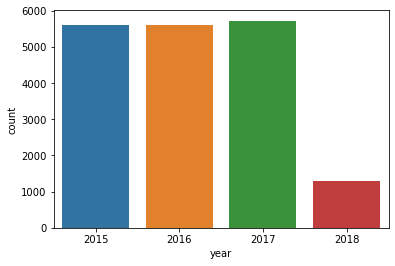

In [29]:
#checking avocado records for years
sns.countplot(df['year'])

In [30]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

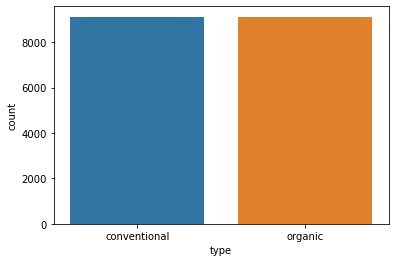

In [31]:
#checking types of avocado
sns.countplot(df['type'])

In [32]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [34]:
df['region'].value_counts()

RaleighGreensboro      338
Plains                 338
Columbus               338
CincinnatiDayton       338
Portland               338
Charlotte              338
SouthCarolina          338
Tampa                  338
Indianapolis           338
HartfordSpringfield    338
Seattle                338
SanFrancisco           338
NewYork                338
Philadelphia           338
Jacksonville           338
Boston                 338
StLouis                338
SouthCentral           338
NorthernNewEngland     338
MiamiFtLauderdale      338
HarrisburgScranton     338
Chicago                338
Louisville             338
Nashville              338
BaltimoreWashington    338
LosAngeles             338
Boise                  338
TotalUS                338
Sacramento             338
Syracuse               338
Midsouth               338
Spokane                338
GreatLakes             338
NewOrleansMobile       338
Orlando                338
Pittsburgh             338
BuffaloRochester       338
L

data is equally distributed for all regions in otherwords there is no imbalance in th region column

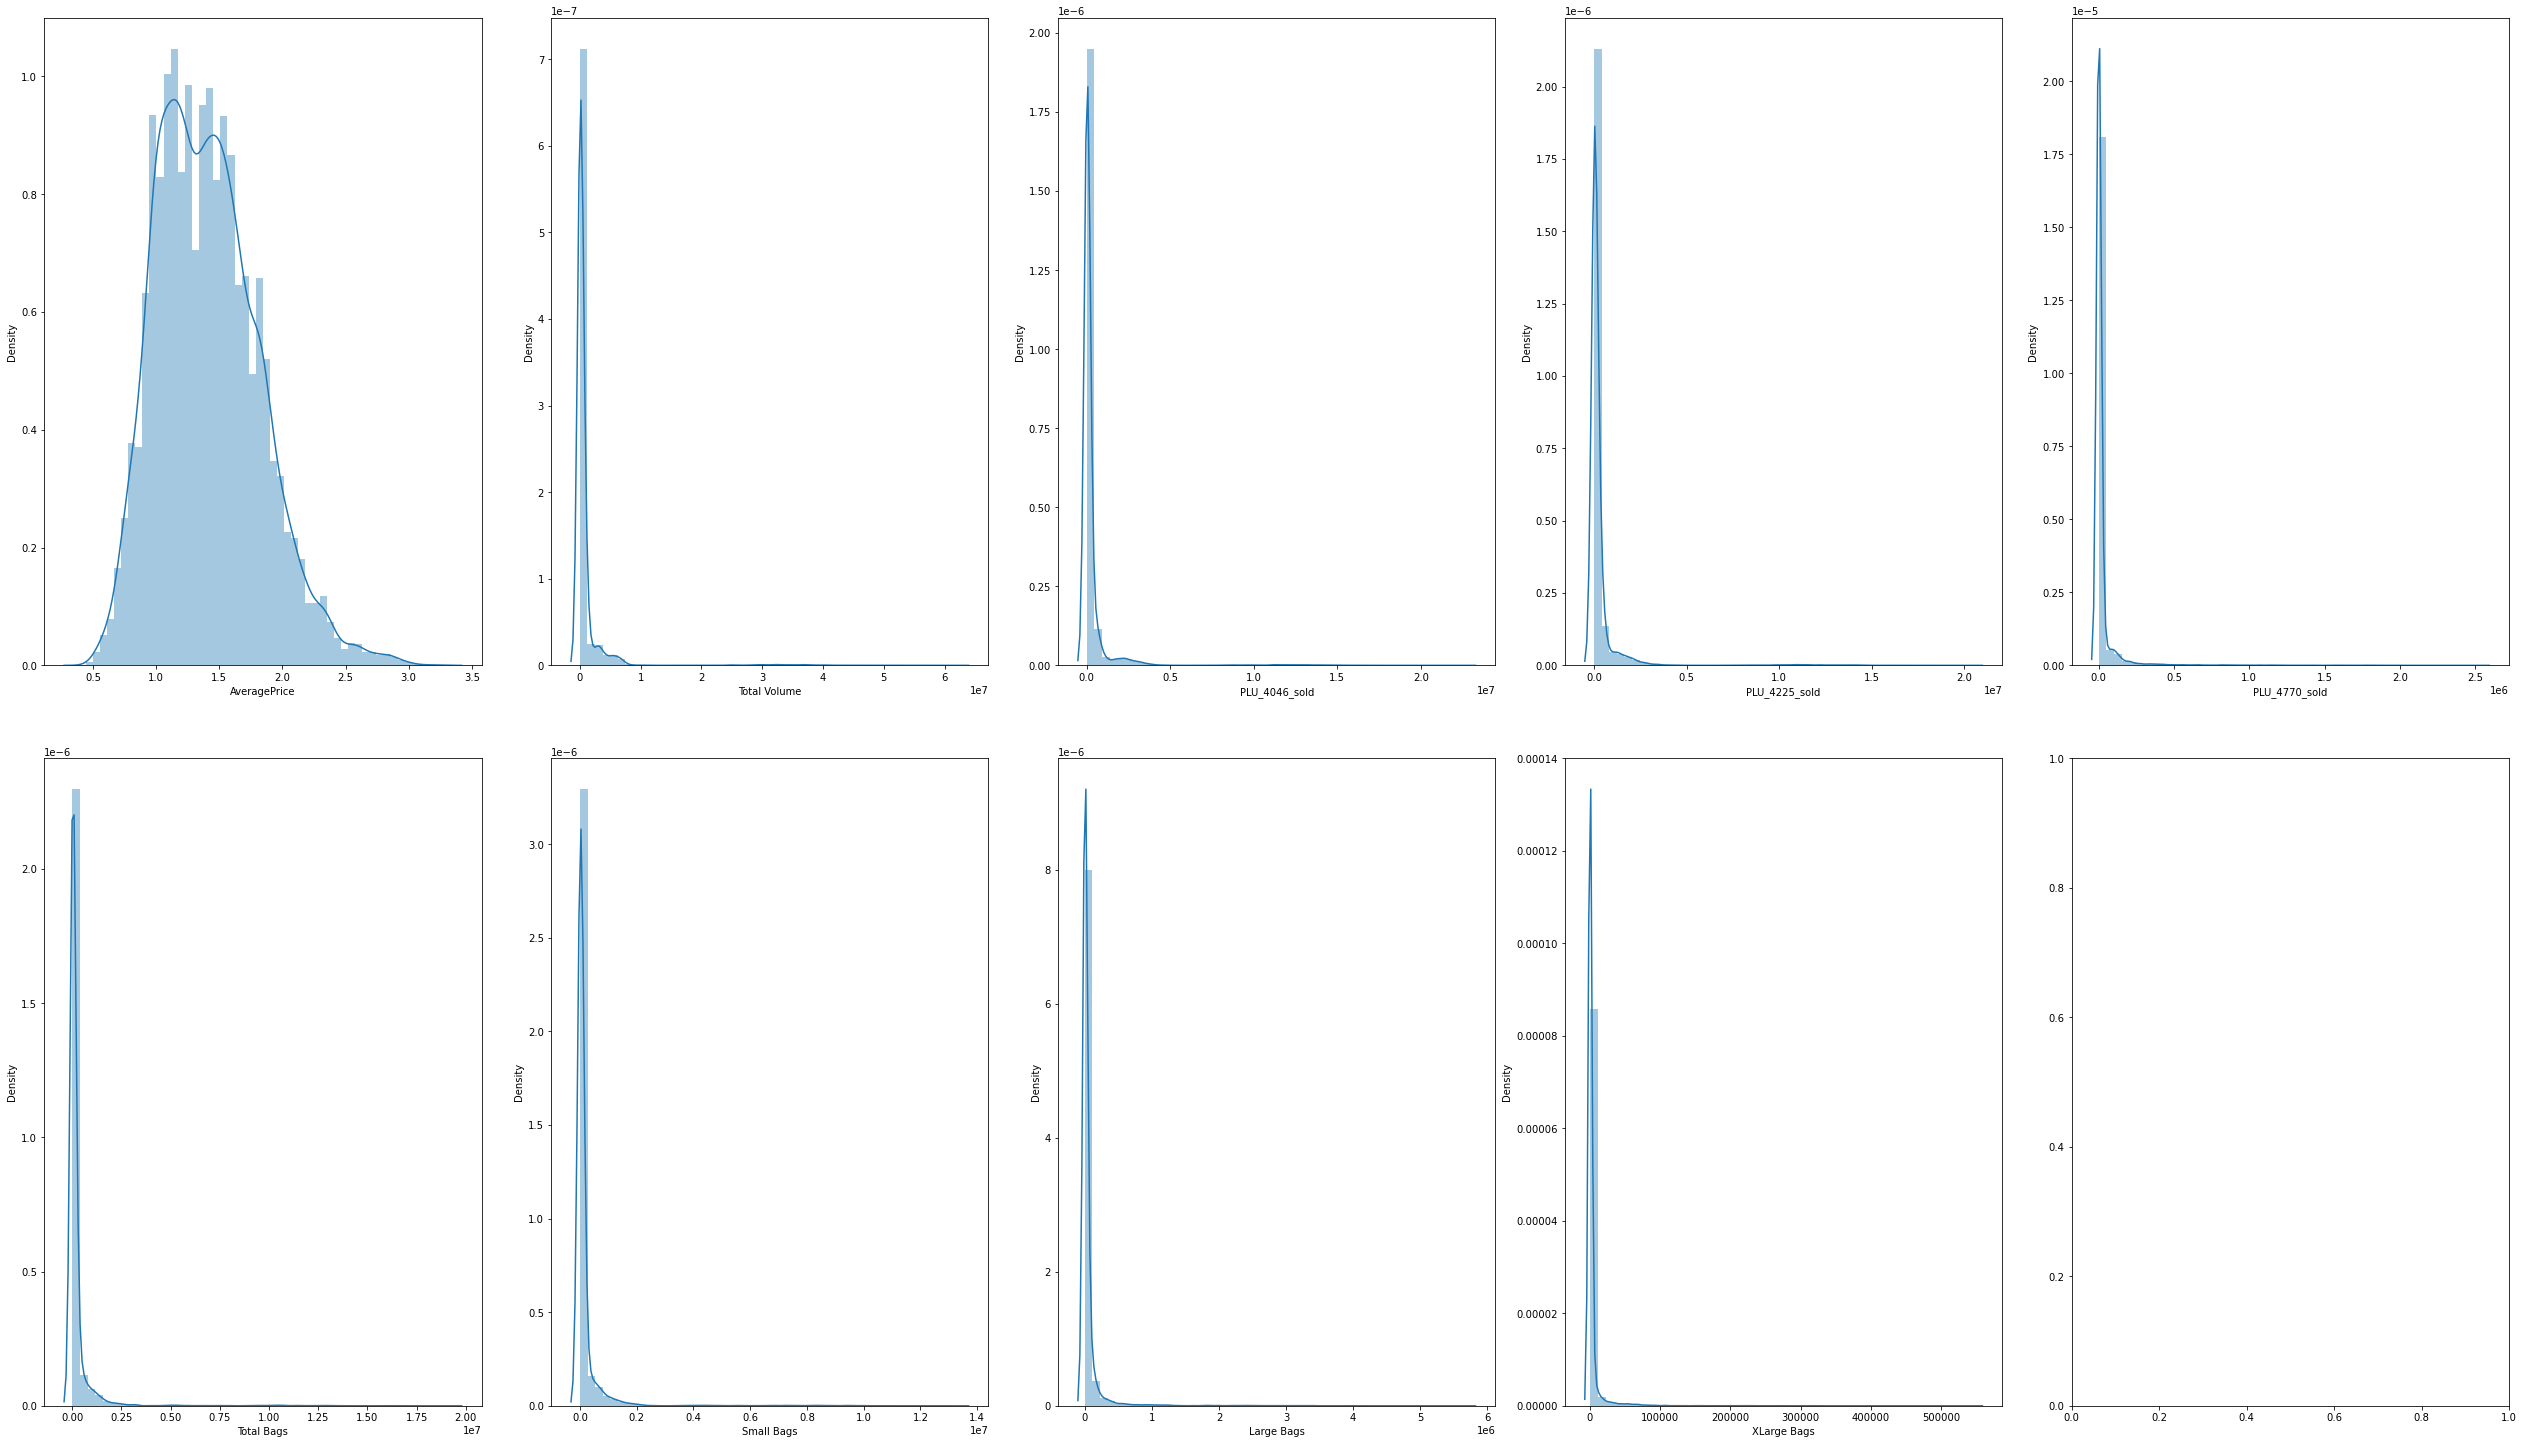

In [61]:
fig, ax=plt.subplots(ncols=5,nrows=2,figsize=(35,20))
index=0
ax=ax.flatten()
for col in df.select_dtypes(exclude='object').columns:
      if col !='year':  
        sns.distplot(df[col],ax=ax[index])
        index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

we see that data is having skewness and need to be corrected

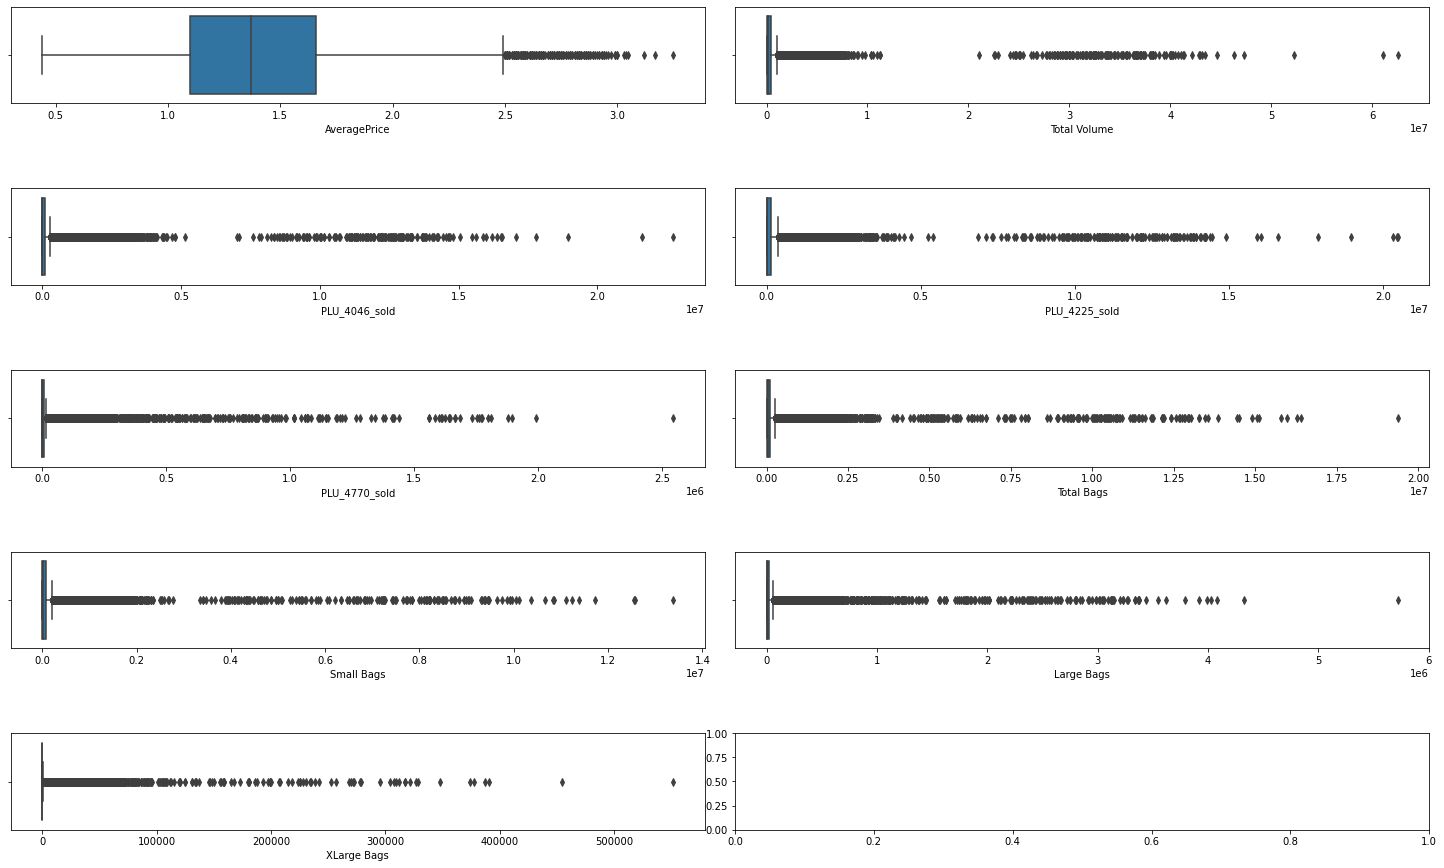

In [54]:
fig, ax=plt.subplots(ncols=2,nrows=5,figsize=(20,12))
index=0
ax=ax.flatten()
for col in df.select_dtypes(exclude='object').columns:
        if(col !='year'):
            sns.boxplot(df[col],ax=ax[index])
            index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

we see that there are alot of outliers in the data

# Bivariate Analysis

In [68]:
df.head()

,AveragePrice,Total Volume,PLU_4046_sold,PLU_4225_sold,PLU_4770_sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December,Sunday
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December,Sunday
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December,Sunday
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December,Sunday
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November,Sunday


<AxesSubplot:xlabel='year', ylabel='Total Bags'>

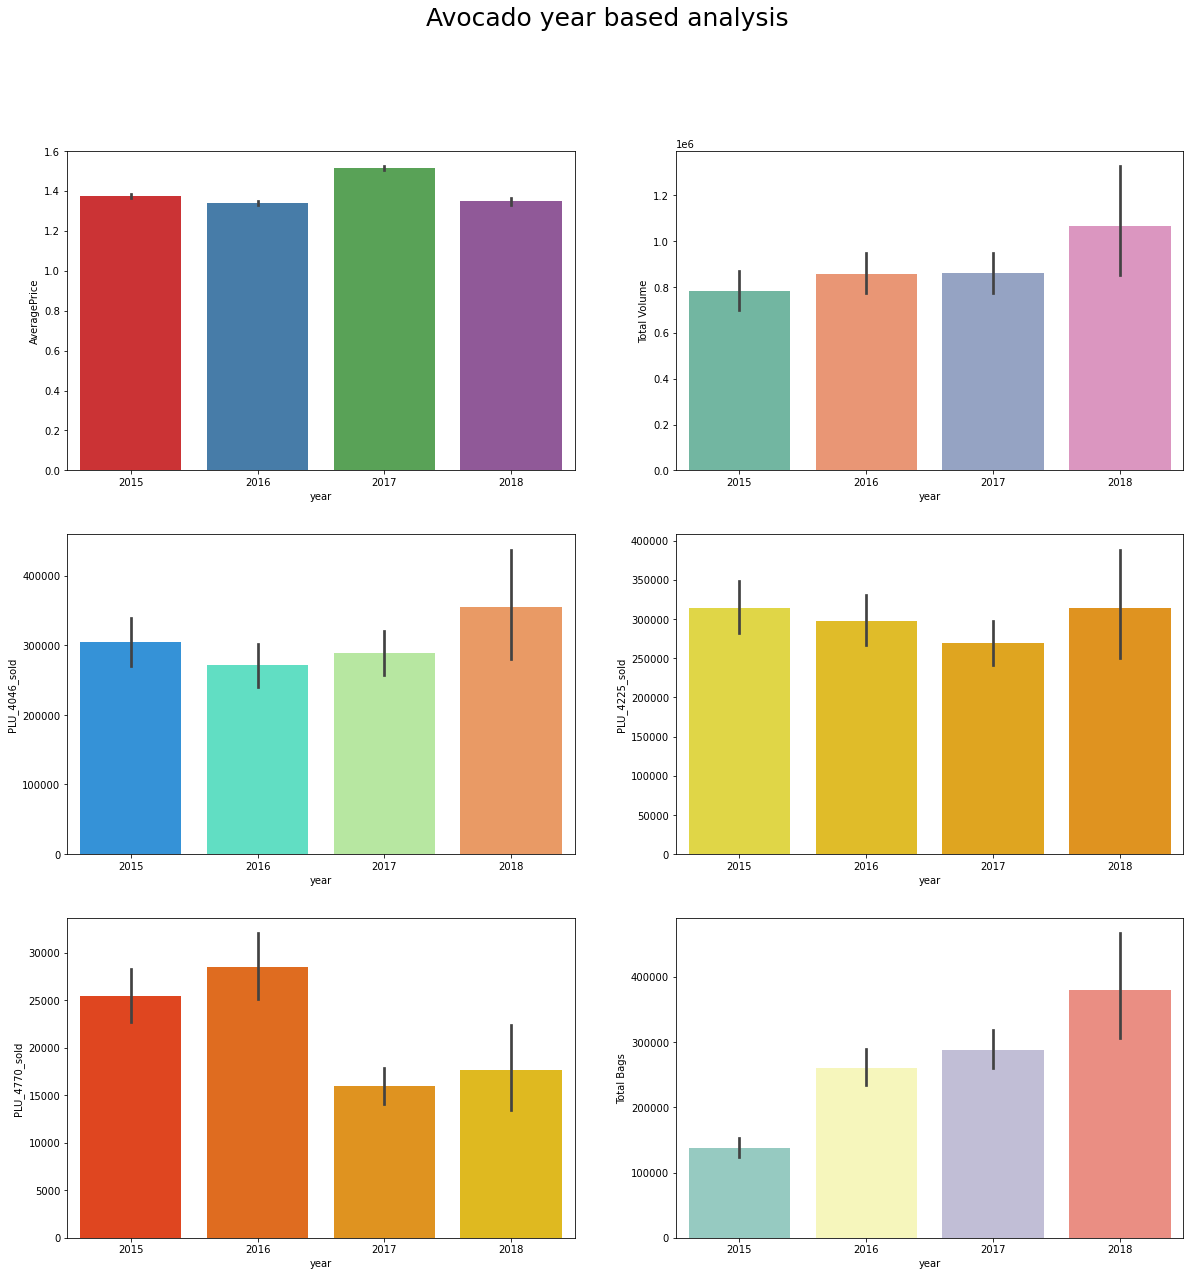

In [73]:
fig,axes=plt.subplots(3,2,figsize=(20,20))
fig.suptitle("Avocado year based analysis",fontsize=25)
sns.barplot(ax=axes[0,0],x='year',y='AveragePrice',data=df,palette='Set1')
sns.barplot(ax=axes[0,1],x='year',y='Total Volume',data=df,palette='Set2')
sns.barplot(ax=axes[1,0],x='year',y='PLU_4046_sold',data=df,palette='rainbow')
sns.barplot(ax=axes[1,1],x='year',y='PLU_4225_sold',data=df,palette='Wistia')
sns.barplot(ax=axes[2,0],x='year',y='PLU_4770_sold',data=df,palette='autumn')
sns.barplot(ax=axes[2,1],x='year',y='Total Bags',data=df,palette='Set3')


### Observations:
1. Maximum average price is observed in 2017 and minimum in 2016.
2. Maximum total volume sold in 2018 and minimum in 2015.
3. Maximum PLU_4046_sold sold in 2018.
4. Maximum PLU_4225_sold sold in 2018.
5. Maximum PLU_4770_sold sold in 2016.
6. Maximum Total Bags sold in 2018.


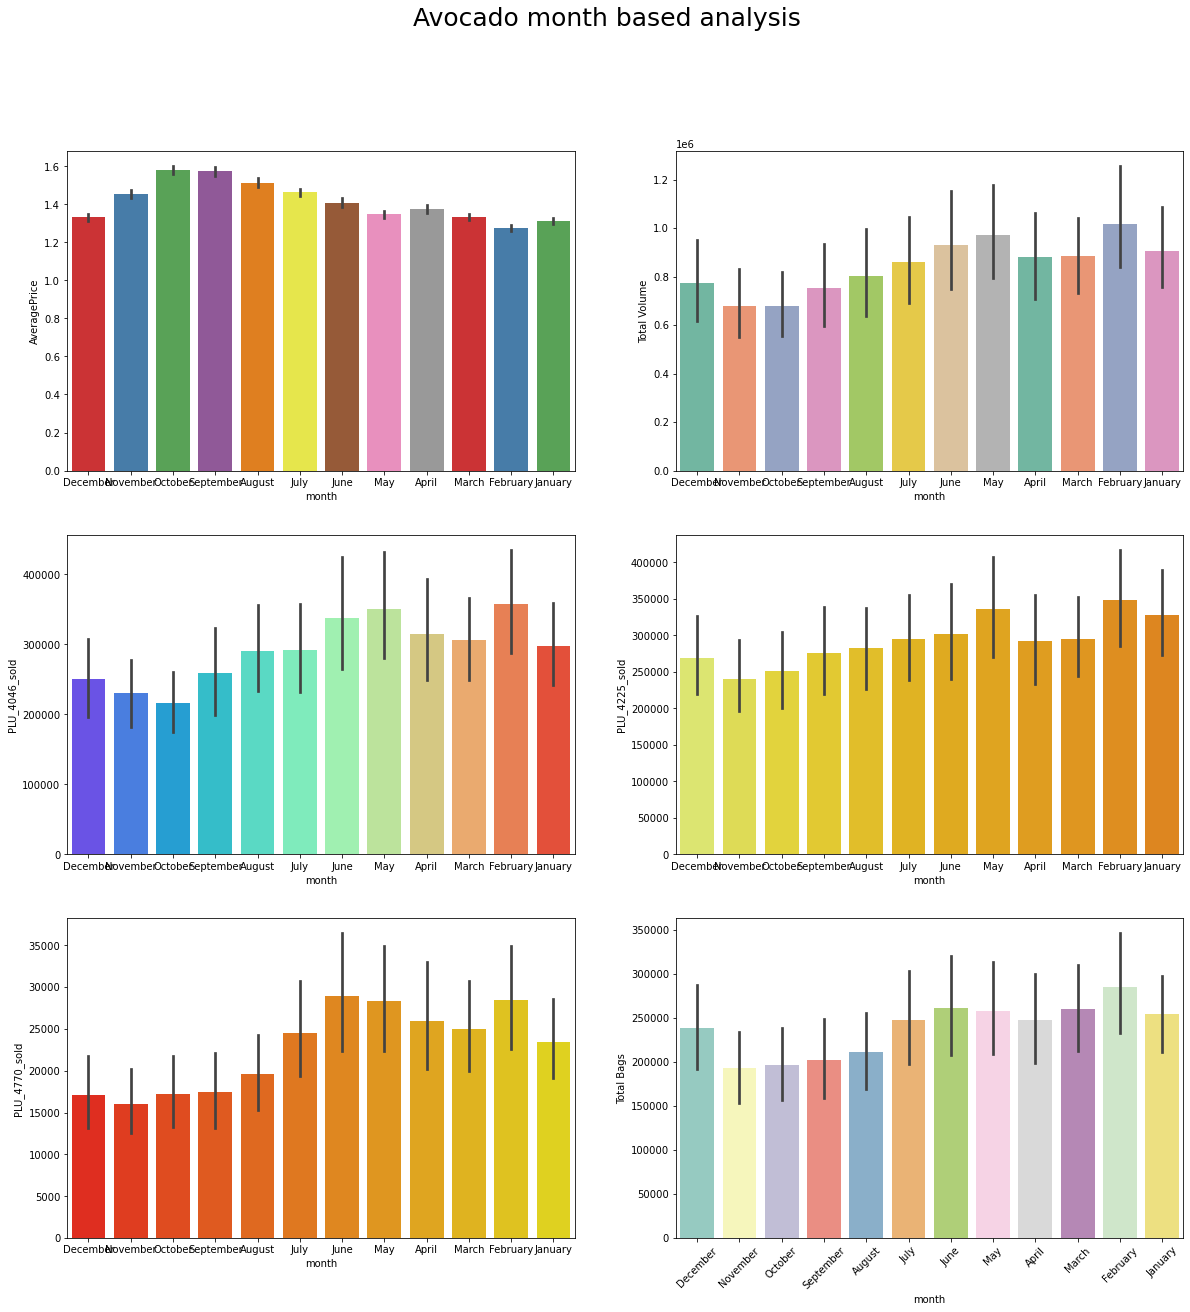

In [83]:
fig,axes=plt.subplots(3,2,figsize=(20,20))
fig.suptitle("Avocado month based analysis",fontsize=25)
sns.barplot(ax=axes[0,0],x='month',y='AveragePrice',data=df,palette='Set1')
sns.barplot(ax=axes[0,1],x='month',y='Total Volume',data=df,palette='Set2')
sns.barplot(ax=axes[1,0],x='month',y='PLU_4046_sold',data=df,palette='rainbow')
sns.barplot(ax=axes[1,1],x='month',y='PLU_4225_sold',data=df,palette='Wistia')
sns.barplot(ax=axes[2,0],x='month',y='PLU_4770_sold',data=df,palette='autumn')
sns.barplot(ax=axes[2,1],x='month',y='Total Bags',data=df,palette='Set3')
plt.xticks(rotation=45)
plt.show()

### Observations:
1. Maximum average price is observed in october and september
2. Maximum total volume sold in february
3. Maximum PLU_4046_sold sold in february.
4. Maximum PLU_4225_sold sold in february.
5. Maximum PLU_4770_sold sold in february.
6. Maximum Total Bags sold in february.

In [86]:
df.head()

,AveragePrice,Total Volume,PLU_4046_sold,PLU_4225_sold,PLU_4770_sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,December,Sunday
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,December,Sunday
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,December,Sunday
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,December,Sunday
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,November,Sunday


<AxesSubplot:title={'center':'Total Avacado sold in each region'}, xlabel='region'>

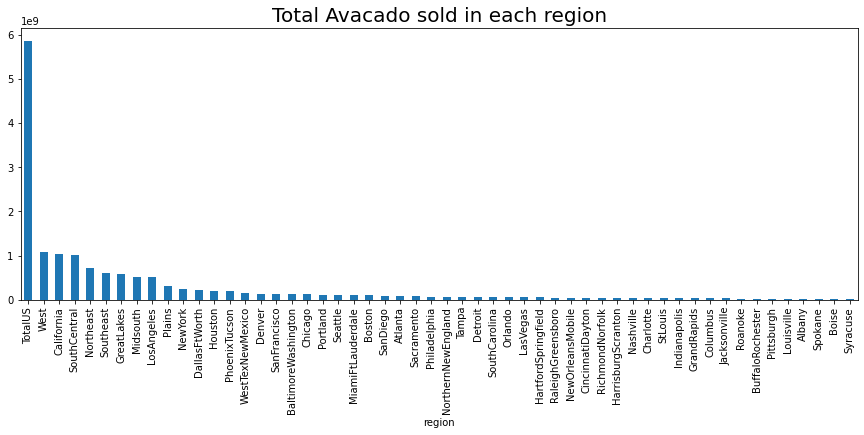

In [95]:
#Avacados sold in each region
plt.figure(figsize=(15,30))
plt.title('Total Avacado sold in each region',{'fontsize':20})
df.groupby("region")["Total Volume"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

Highest number of avocados sold in TotalUS and least number in Albany,Spokane,Boise etc

In [97]:
df['day'].value_counts()

Sunday    18249
Name: day, dtype: int64

In [115]:
region=df.groupby("region")['AveragePrice'].sum().sort_values(ascending=False).reset_index()

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

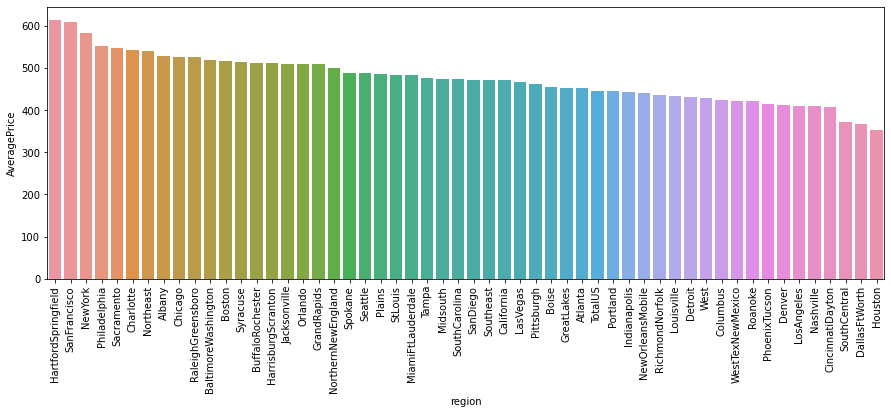

In [117]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(x=region['region'],y=region['AveragePrice'])

HartfordSpringfield has highest Average price and Hoston has lowest Average price

# Multivariate Analysis

In [118]:
df.describe()

,AveragePrice,Total Volume,PLU_4046_sold,PLU_4225_sold,PLU_4770_sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### Observations:
1. The std of XLarge Bags is very high
2. There might be outliers present in the dataset due to high difference between 75th percentile and max
3. There might be small amount of skewness in the data due to differences in mean and median.

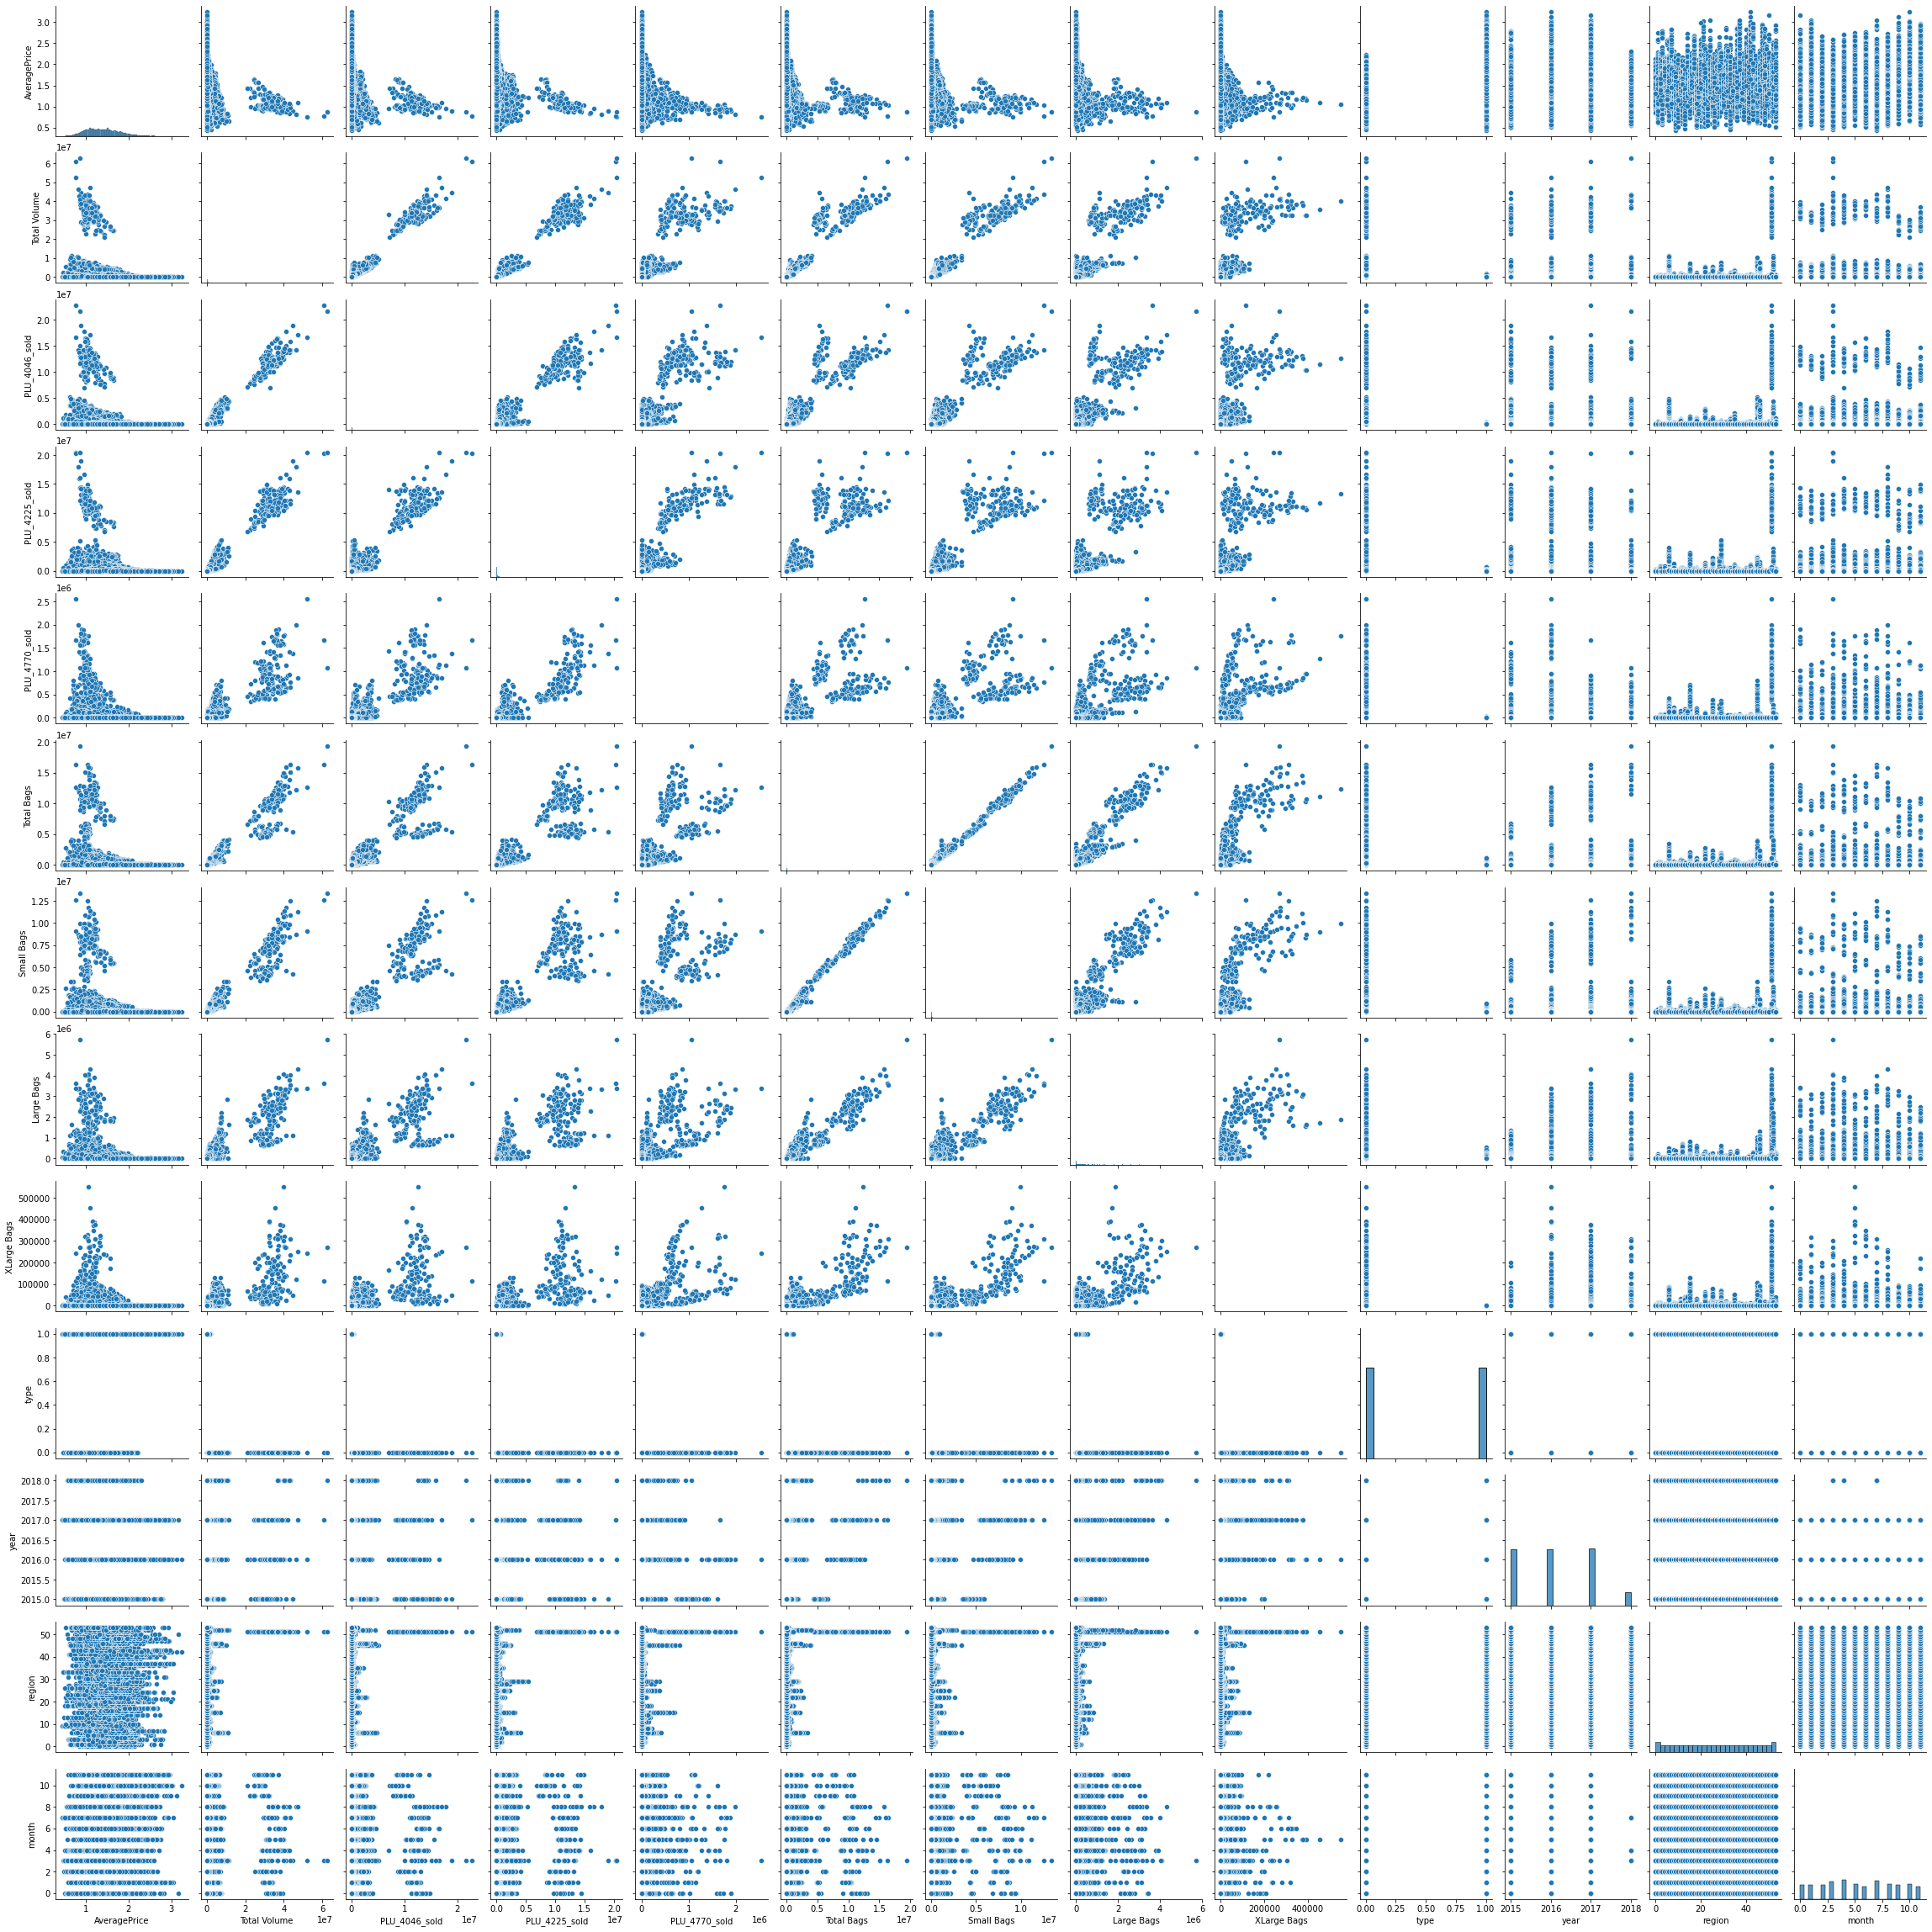

In [442]:
sns.pairplot(df)


## Checking correlation of dataset

In [119]:
df.corr()

,AveragePrice,Total Volume,PLU_4046_sold,PLU_4225_sold,PLU_4770_sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
PLU_4046_sold,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
PLU_4225_sold,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
PLU_4770_sold,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<AxesSubplot:>

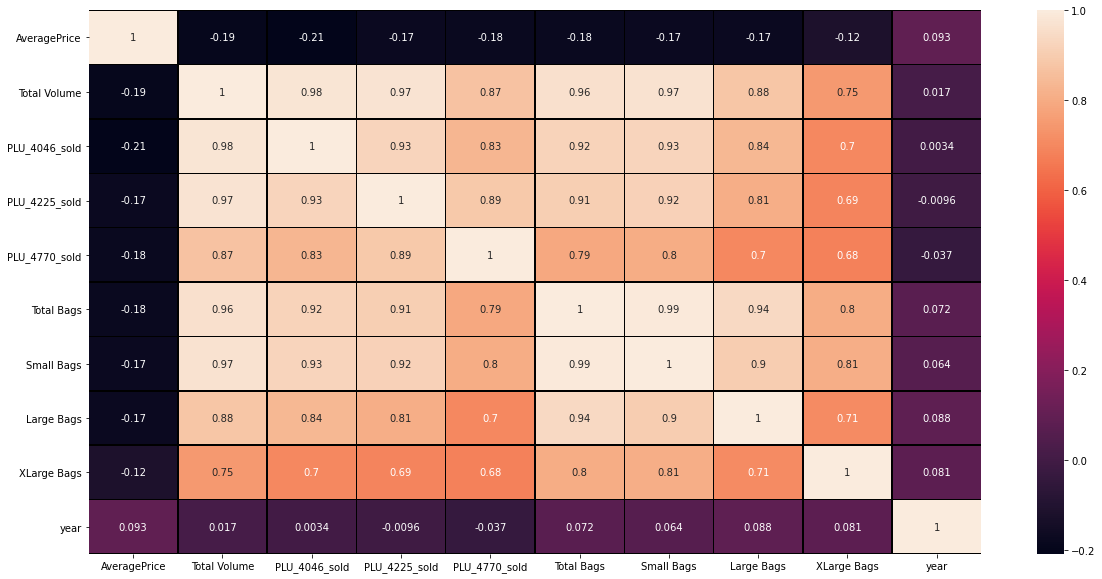

In [121]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=0.5,linecolor='black',annot=True)

### Observations:
1. Total Volume and PLU_4046_sold having very high correlation of 0.98.
2. Total Volume and PLU_4225_sold having very high correlation of 0.97,0.97.
3. Total Volume and Total Bags,Small Bags having very high correlation of 0.96.
4. Most of the columns are highly correlated with eachother.


# Encoding

In [122]:
df.dtypes

AveragePrice     float64
Total Volume     float64
PLU_4046_sold    float64
PLU_4225_sold    float64
PLU_4770_sold    float64
Total Bags       float64
Small Bags       float64
Large Bags       float64
XLarge Bags      float64
type              object
year               int64
region            object
month             object
day               object
dtype: object

month,day,region,type need to be encoded

In [124]:
le=LabelEncoder()

In [125]:
col=['month','day','region','type']
for i in col:
    df[i]=le.fit_transform(df[i])

In [126]:
df.head()

,AveragePrice,Total Volume,PLU_4046_sold,PLU_4225_sold,PLU_4770_sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,2,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,2,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,2,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,2,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,9,0


In [128]:
df.dtypes

AveragePrice     float64
Total Volume     float64
PLU_4046_sold    float64
PLU_4225_sold    float64
PLU_4770_sold    float64
Total Bags       float64
Small Bags       float64
Large Bags       float64
XLarge Bags      float64
type               int32
year               int64
region             int32
month              int32
day                int32
dtype: object

# Checking Skewness

In [129]:
df.skew()

AveragePrice      0.580303
Total Volume      9.007687
PLU_4046_sold     8.648220
PLU_4225_sold     8.942466
PLU_4770_sold    10.159396
Total Bags        9.756072
Small Bags        9.540660
Large Bags        9.796455
XLarge Bags      13.139751
type              0.000329
year              0.215339
region            0.000030
month             0.027653
day               0.000000
dtype: float64

Total Volume,PLU_4046,PLU_4225_sold,PLU_4770_sold,Total Bags,Small Bags,Large Bags,XLarge Bags havong very high skewness

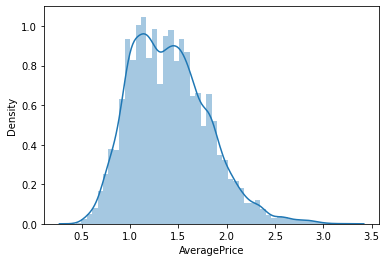

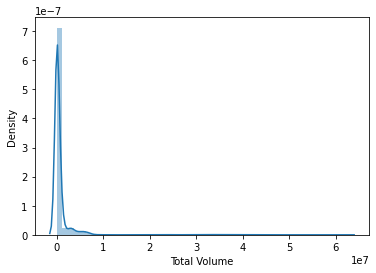

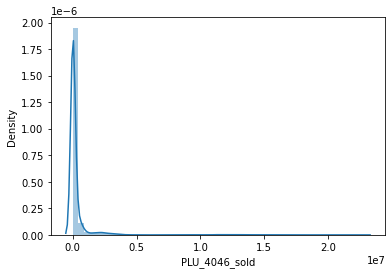

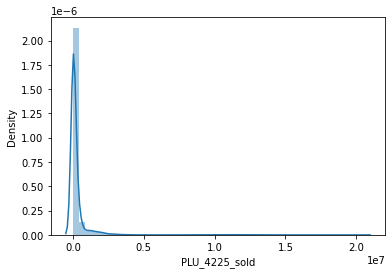

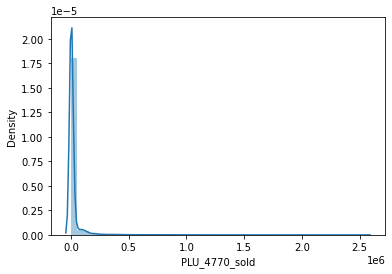

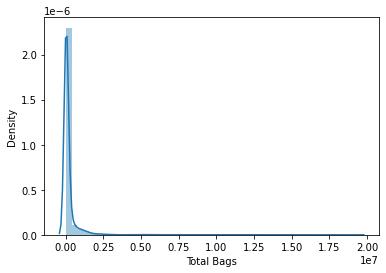

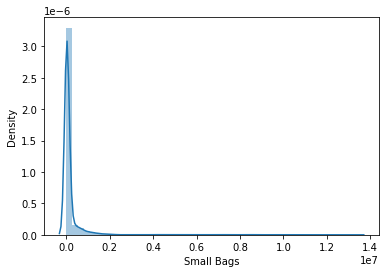

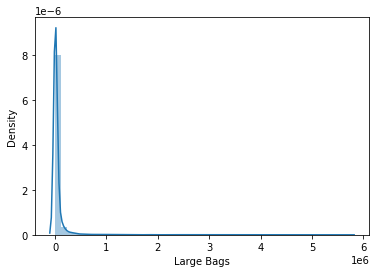

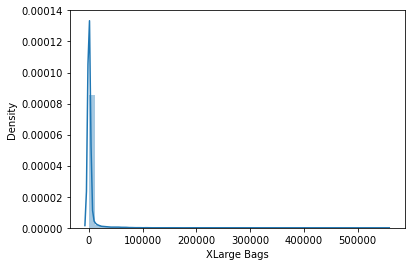

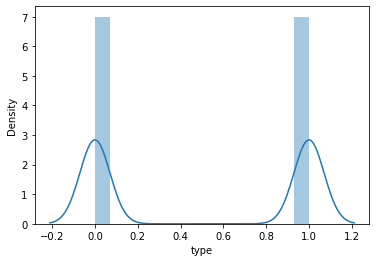

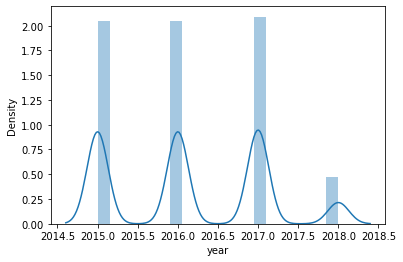

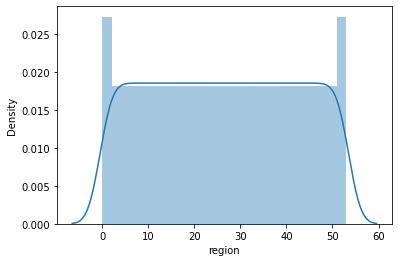

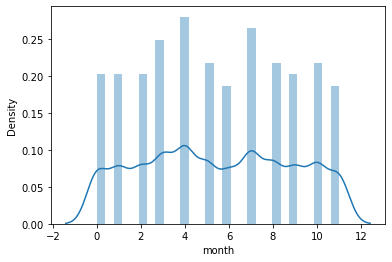

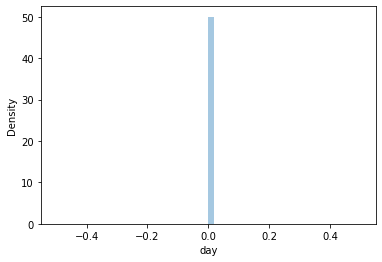

In [130]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [ ]:
#we can drop day column as there is no variance
df['day'].value_counts()
df.drop(['day'],axis=1,inplace=True)

# Removing Outliers

In [157]:
z=np.abs(zscore(df))

In [158]:
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

In [159]:
df_new=df[(z<3).all(axis=1)]

In [160]:
df_new.shape

(17651, 13)

In [161]:
df.shape

(18249, 13)

In [162]:
#percentage loss of data
(18249-17651)*100/18249

3.276891884486821

nearly 3% data has been lost due to outliers

# Seperating labels and columns for classification

In [176]:
x=df_new.drop('region',axis=1)
y=df_new['region']

In [177]:
y.value_counts()

0     338
4     338
9     338
8     338
39    338
23    338
16    338
38    338
11    338
27    338
12    338
5     338
44    338
26    338
13    338
49    338
34    338
32    338
35    338
2     338
18    338
10    338
30    338
19    338
28    337
1     337
20    337
50    336
33    336
40    336
41    336
14    336
31    335
24    335
21    333
48    333
25    333
7     332
53    332
22    331
17    331
36    330
3     329
37    328
47    328
43    326
29    325
46    307
42    301
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

In [178]:
#we see that there is data imbalance.So we can use smote class to clear dataimbalance
smt=SMOTE()

In [179]:
x,y=smt.fit_resample(x,y)

In [180]:
y.value_counts()

0     338
27    338
39    338
8     338
24    338
40    338
9     338
25    338
41    338
10    338
26    338
42    338
11    338
43    338
16    338
12    338
28    338
44    338
13    338
29    338
45    338
14    338
30    338
46    338
15    338
31    338
23    338
7     338
38    338
22    338
32    338
48    338
1     338
17    338
33    338
49    338
2     338
18    338
34    338
50    338
3     338
19    338
35    338
51    338
4     338
20    338
36    338
52    338
5     338
21    338
37    338
53    338
6     338
47    338
Name: region, dtype: int64

now dataset is balanced

# Treating skewness

In [181]:
x.skew()

AveragePrice     0.375222
Total Volume     3.649196
PLU_4046_sold    4.723624
PLU_4225_sold    4.270344
PLU_4770_sold    4.964118
Total Bags       3.910213
Small Bags       4.058013
Large Bags       4.791323
XLarge Bags      6.024543
type            -0.062056
year             0.235210
month            0.034295
dtype: float64

In [183]:
for col in x.columns:
    if x.skew().loc[col]>0.5:
        x[col]=power_transform(x[col].values.reshape(-1,1))

In [174]:
x.skew()

AveragePrice     0.375155
Total Volume    -0.011315
PLU_4046_sold   -0.040752
PLU_4225_sold   -0.046205
PLU_4770_sold    0.019290
Total Bags      -0.023437
Small Bags      -0.026363
Large Bags      -0.111743
XLarge Bags      0.847692
type            -0.062934
year             0.235088
month            0.037807
dtype: float64

# Correcting Multicollinearity problem

In [185]:
x.corr()

,AveragePrice,Total Volume,PLU_4046_sold,PLU_4225_sold,PLU_4770_sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,month
AveragePrice,1.000000,-0.569651,-0.547110,-0.446532,-0.488045,-0.549923,-0.478375,-0.471316,-0.390548,0.612724,0.094321,0.106879
Total Volume,-0.569651,1.000000,0.892454,0.927098,0.818870,0.941741,0.907924,0.691329,0.626218,-0.775886,0.074707,-0.008814
PLU_4046_sold,-0.547110,0.892454,1.000000,0.770830,0.739937,0.804274,0.784045,0.611412,0.572663,-0.707509,-0.004748,-0.005106
PLU_4225_sold,-0.446532,0.927098,0.770830,1.000000,0.798642,0.824782,0.791799,0.625700,0.582220,-0.726209,-0.006410,-0.008796
PLU_4770_sold,-0.488045,0.818870,0.739937,0.798642,1.000000,0.761333,0.754839,0.553279,0.615410,-0.766747,-0.053931,-0.007934
Total Bags,-0.549923,0.941741,0.804274,0.824782,0.761333,1.000000,0.951457,0.739921,0.607743,-0.696665,0.208772,-0.009975
Small Bags,-0.478375,0.907924,0.784045,0.791799,0.754839,0.951457,1.000000,0.581345,0.599807,-0.693937,0.185933,-0.011331
Large Bags,-0.471316,0.691329,0.611412,0.625700,0.553279,0.739921,0.581345,1.000000,0.446445,-0.474205,0.185030,-0.004553
XLarge Bags,-0.390548,0.626218,0.572663,0.582220,0.615410,0.607743,0.599807,0.446445,1.000000,-0.665143,0.162556,-0.013345
type,0.612724,-0.775886,-0.707509,-0.726209,-0.766747,-0.696665,-0.693937,-0.474205,-0.665143,1.000000,0.004482,-0.010620


In [186]:
vif=pd.DataFrame()

In [187]:
vif['Variables']=x.columns

In [188]:
vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [189]:
vif

,Variables,VIF factor
0,AveragePrice,29.328097
1,Total Volume,57.175370
2,PLU_4046_sold,7.078214
3,PLU_4225_sold,12.667196
4,PLU_4770_sold,3.795393
5,Total Bags,35.943274
6,Small Bags,17.787099
7,Large Bags,3.557594
8,XLarge Bags,1.991736
9,type,8.133942


Total Volume has got highest VIF

In [194]:
vif

,Variables,VIF factor
0,AveragePrice,29.328097
1,Total Volume,57.175370
2,PLU_4046_sold,7.078214
3,PLU_4225_sold,12.667196
4,PLU_4770_sold,3.795393
5,Total Bags,35.943274
6,Small Bags,17.787099
7,Large Bags,3.557594
8,XLarge Bags,1.991736
9,type,8.133942


In [ ]:
x.drop(['Total Volume','Total Bags'],axis=1,inplace=True)

In [202]:
vif=pd.DataFrame()
vif['Variables']=x.columns
vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [203]:
vif

,Variables,VIF factor
0,AveragePrice,26.815612
1,PLU_4046_sold,3.577228
2,PLU_4225_sold,4.268160
3,PLU_4770_sold,3.778228
4,Small Bags,3.625109
5,Large Bags,1.922673
6,XLarge Bags,1.978940
7,type,7.849756
8,year,22.615479
9,month,3.752117


Thus we removed multicollinearity problem

# Scaling

In [206]:
sc=StandardScaler()
scale_x=sc.fit_transform(x)
df_x=pd.DataFrame(scale_x,columns=x.columns)

In [207]:
df_x.head()

,AveragePrice,PLU_4046_sold,PLU_4225_sold,PLU_4770_sold,Small Bags,Large Bags,XLarge Bags,type,year,month
0,-0.200926,-0.680361,0.323824,-0.240008,-0.367682,-0.799993,-0.680518,-1.031506,-1.206725,-1.030104
1,-0.148945,-0.799307,0.242166,-0.192875,-0.332001,-0.790160,-0.680518,-1.031506,-1.206725,-1.030104
2,-1.240545,-0.754223,0.620996,0.005634,-0.394403,-0.777639,-0.680518,-1.031506,-1.206725,-1.030104
3,-0.850688,-0.655689,0.440867,-0.139028,-0.529375,-0.718960,-0.680518,-1.031506,-1.206725,-1.030104
4,-0.330879,-0.707269,0.234803,-0.128392,-0.509152,-0.627969,-0.680518,-1.031506,-1.206725,1.070919


# Building the Model For Classification

In [261]:
#splitting the dataframe
maxAccu=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.2,random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    pred_test=knn.predict(x_test)
    acc=accuracy_score(y_test,pred_test)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("the max acc is ",maxAccu," at rs ",maxRS)

the max acc is  0.7699260476581758  at rs  63


In [444]:
x_train,x_test,y_train,y_test=train_test_split(df_x,y,test_size=0.2,random_state=63)

# DecisionTreeClassifier

In [268]:
dt=DecisionTreeClassifier()

In [269]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [270]:
pred_test=dt.predict(x_test)

In [271]:
acc=accuracy_score(y_test,pred_test)

In [272]:
acc

0.8069022185702547

# KNN algorithm

In [273]:
kn=KNeighborsClassifier()

In [274]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [275]:
pred_test=kn.predict(x_test)

In [276]:
acc=accuracy_score(y_test,pred_test)

In [277]:
acc

0.7699260476581758

# Support Vector Classifier

In [278]:
sv=SVC()

In [279]:
sv.fit(x_train,y_train)

SVC()

In [280]:
pred_test=sv.predict(x_test)

In [281]:
acc=accuracy_score(y_test,pred_test)

In [282]:
acc

0.8071761161325665

# Random Forest Classifier

In [445]:
rf=RandomForestClassifier()

In [446]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [447]:
pred_test=rf.predict(x_test)

In [448]:
acc=accuracy_score(y_test,pred_test)

In [449]:
acc

0.924404272801972

# Cross Validation Score

In [ ]:
scr=cross_val_score(lr,df_x,y,cv=20)
print("the cross validation score for logistic regression is",scr.mean())

In [327]:
scr2=cross_val_score(dt,df_x,y,cv=20)
print("the cross validation score for decision tree classifier is",scr2.mean())

the cross validation score for decision tree classifier is 0.6978227503314696


In [450]:
scr3=cross_val_score(rf,df_x,y,cv=20)
print("the cross validation score for random forest classifier is",scr3.mean())

the cross validation score for random forest classifier is 0.8277785784285466


In [ ]:
scr4=cross_val_score(sv,df_x,y,cv=20)
print("the cross validation score for support vector classifier is",scr4.mean())

In [ ]:
scr5=cross_val_score(kn,df_x,y,cv=20)
print("the cross validation score for support vector classifier is",scr5.mean())

# Hyperparameter Tuning for Random Forest Classifier

In [294]:
param_grid={'max_features': ['auto','sqrt','log2'],
            'max_depth':[6,7,8,50],'criterion':['gini','entropy']}

In [295]:
GCV=GridSearchCV(RandomForestClassifier(),param_grid,cv=5,scoring='accuracy')

In [296]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 50],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [297]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto'}

In [329]:
rf=RandomForestClassifier(max_features='auto',criterion='entropy',max_depth=50)

In [330]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, max_features='auto')

In [331]:
pred_test=rf.predict(x_test)

In [332]:
acc=accuracy_score(y_test,pred_test)

In [333]:
acc

0.9213913996165434

In [335]:
print(confusion_matrix(y_test,pred_test))

[[68  0  0 ...  0  0  0]
 [ 0 60  0 ...  0  0  0]
 [ 0  0 71 ...  0  0  0]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  1 67  0]
 [ 0  0  1 ...  0  0 50]]


In [336]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        75
           1       0.91      0.88      0.90        68
           2       0.92      1.00      0.96        71
           3       0.89      0.91      0.90        65
           4       0.97      0.94      0.95        64
           5       0.90      0.79      0.84        68
           6       1.00      1.00      1.00        55
           7       0.90      0.93      0.92        76
           8       0.96      0.99      0.97        73
           9       0.84      0.94      0.89        54
          10       0.88      0.87      0.88        61
          11       0.95      0.99      0.97        77
          12       0.97      0.99      0.98        72
          13       0.93      0.93      0.93        72
          14       0.92      0.94      0.93        71
          15       1.00      0.98      0.99        51
          16       0.93      0.98      0.96        65
          17       0.98    

# Hyperparameter Tuning for KNN Classifier

In [305]:
kn=KNeighborsClassifier()

In [306]:
parameters={'n_neighbors' : range(1,30)}

In [309]:
gridsearch=GridSearchCV(kn,parameters,cv=5,scoring='accuracy')
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'n_neighbors': 1}

In [338]:
kn= KNeighborsClassifier(n_neighbors=1)


In [339]:
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [340]:
pred_test=kn.predict(x_test)

In [341]:
acc=accuracy_score(y_test,pred_test)

In [342]:
acc

0.8625034237195289

In [343]:
print(confusion_matrix(y_test,pred_test))

[[66  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  1]
 [ 0  0 65 ...  0  0  0]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  0  1 ...  0  0 51]]


In [344]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        75
           1       0.74      0.74      0.74        68
           2       0.96      0.92      0.94        71
           3       0.81      0.85      0.83        65
           4       0.95      0.97      0.96        64
           5       0.89      0.81      0.85        68
           6       0.95      0.96      0.95        55
           7       0.86      0.93      0.89        76
           8       0.96      1.00      0.98        73
           9       0.69      0.70      0.70        54
          10       0.67      0.70      0.69        61
          11       0.95      0.95      0.95        77
          12       1.00      0.94      0.97        72
          13       0.79      0.72      0.75        72
          14       0.93      0.96      0.94        71
          15       0.98      0.98      0.98        51
          16       0.95      0.97      0.96        65
          17       1.00    

Based on above analysis random forest classifier is select as best model.

# Saving the best model

In [346]:
joblib.dump(rf,"AvocadoClassifier.pkl")

['AvocadoClassifier.pkl']

# Seperating labels and columns for Regression

In [348]:
df_new

,AveragePrice,Total Volume,PLU_4046_sold,PLU_4225_sold,PLU_4770_sold,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,2
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,2
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,2
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,2
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,3
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,4
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,4
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,4


In [353]:
xr=df_new.drop(['AveragePrice','Total Volume','Total Bags'],axis=1)
yr=df_new['AveragePrice']

# Treating skewness

In [354]:
xr.skew()

PLU_4046_sold    4.909848
PLU_4225_sold    4.455745
PLU_4770_sold    5.117170
Small Bags       4.222706
Large Bags       5.053434
XLarge Bags      6.135607
type            -0.037741
year             0.229976
region           0.012798
month            0.029197
dtype: float64

In [355]:
for col in xr.columns:
    if xr.skew().loc[col]>0.5:
        xr[col]=power_transform(xr[col].values.reshape(-1,1))

In [357]:
xr.skew()

PLU_4046_sold   -0.039282
PLU_4225_sold   -0.044675
PLU_4770_sold    0.024168
Small Bags      -0.024405
Large Bags      -0.110913
XLarge Bags      0.853758
type            -0.037741
year             0.229976
region           0.012798
month            0.029197
dtype: float64

# Scaling

In [362]:
sc=StandardScaler()
scale_xr=sc.fit_transform(xr)
df_xr=pd.DataFrame(scale_xr,columns=xr.columns)

In [384]:
x_train,x_test,y_train,y_test = train_test_split(df_xr,yr,random_state = 80,test_size = 0.33)

# Linear Regression

In [402]:
#splitting the dataframe
maxAccu=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(df_xr,yr,test_size=0.2,random_state=i)
    knn=KNeighborsRegressor()
    knn.fit(x_train,y_train)
    pred_test=knn.predict(x_test)
    acc=r2_score(y_test,pred_test)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("the max acc is ",maxAccu," at rs ",maxRS)

the max acc is  0.8292967065865419  at rs  40


In [417]:
x_train,x_test,y_train,y_test=train_test_split(df_xr,yr,test_size=0.2,random_state=40)

In [418]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_test = lr.predict(x_test)
acc = r2_score(y_test,pred_test)

acc

0.4892261194520574

# Random Forest Regression

In [419]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred_test = rf.predict(x_test)
acc = r2_score(y_test,pred_test)

acc

0.8799334604528113

# KNN Regressor

In [420]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
pred_test = knr.predict(x_test)
acc = r2_score(y_test,pred_test)

acc

0.8292967065865419

# Decision Tree Regressor

In [421]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_test = dtr.predict(x_test)
acc = r2_score(y_test,pred_test)

acc

0.7507827190944145

# Ridge Regression

In [422]:
rd = Ridge()
rd.fit(x_train,y_train)
predict_rd = rd.predict(x_test)

acc = r2_score(y_test,predict_rd)
acc

0.4892292295593845

# Support Vector Regressor

In [423]:
sv=SVR()
sv.fit(x_train,y_train)
predict_test= sv.predict(x_test)

acc = r2_score(y_test,predict_rd)
acc

0.4892292295593845

# Cross Validation

In [410]:
cvs1= cross_val_score(lr,df_xr,yr,cv=5)
print("Cross Validation of Linear Regression model ",cvs1.mean())

Cross Validation of Linear Regression model  0.04738014716754755


In [411]:
cvs2= cross_val_score(rf,df_xr,yr,cv=5)
print("Cross Validation of RandomForest Regression model ",cvs2.mean())

Cross Validation of RandomForest Regression model  0.2565488285289366


In [412]:
cvs3= cross_val_score(knr,df_xr,yr,cv=5)
print("Cross Validation of KNeighbors Regression model ",cvs3.mean())

Cross Validation of KNeighbors Regression model  0.1216034047319637


In [413]:
cvs4= cross_val_score(dtr,df_xr,yr,cv=5)
print("Cross Validation of DecisionTree Regression model ",cvs4.mean())

Cross Validation of DecisionTree Regression model  -0.27612107979854855


# Hyper Parameter Tuning for Random Forest Regressor

In [432]:
param_grid={'bootstrap': [True, False],
               
               'max_features': ['auto','sqrt','log2'],
               'min_samples_leaf': [1, 2],
               
               'n_estimators': [200, 500,600],
                }

In [433]:
rf_grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,verbose=5,n_jobs=-1)

In [434]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [200, 500, 600]},
             verbose=5)

In [436]:
rf_grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 600}

In [437]:
rfr=RandomForestRegressor(bootstrap= False,
 max_features='sqrt',
 min_samples_leaf=1,
 n_estimators= 600)

In [438]:
rfr.fit(x_train,y_train)
pred_test = rfr.predict(x_test)
acc = r2_score(y_test,pred_test)

acc

0.8962423671520219

In [440]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_test))
print('Mean squared Error: ', mean_squared_error(y_test,pred_test))

Mean Absolute Error:  0.08695749551590683
Mean squared Error:  0.01534729121282925


# Hyper Parameter Tuning for KNN Regressor

In [424]:
KN = KNeighborsRegressor()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(KN,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'n_neighbors': 2}

In [425]:
KN = KNeighborsRegressor(n_neighbors=2)

In [426]:
KN.fit(x_train,y_train)
pred_test = KN.predict(x_test)
acc = r2_score(y_test,pred_test)

acc

0.8459349139214905

In [429]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_test))
print('Mean squared Error: ', mean_squared_error(y_test,pred_test))


Mean Absolute Error:  0.103946474086661
Mean squared Error:  0.022788508920985558


Based on above analysis random forest classifier is select as best model.

In [441]:
#Saving the model
joblib.dump(rfr,"AvocadoRegression.pkl")

['AvocadoRegreesion.pkl']